In [8]:
#%pip install numpy scipy matplotlib neuron --quiet

In [9]:
import numpy as np
import pylab as plt
plt.ion()

In [10]:
!nrnivmodl #> null.out

/home/tnieus/mne-python/1.1.0_0/envs/neuron/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/home/tnieus/Documents/teaching/AA 2025-2026/Cell Biophysics/lezioni/cell_biophysics_AA2526
Mod files: "./leak.mod" "./potassium.mod" "./sodium.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special


# Model setting

In [11]:
from neuron import h
soma = h.Section(name='soma')
soma.L = 10
soma.diam = 10
soma.insert('sodium')
soma.insert('potassium')
soma.insert('leak')

soma

In [12]:
print(soma.gnabar_sodium)
print(soma.gkbar_potassium)

0.12
0.036


In [13]:
tstop = 1000
onset = 200
dur = tstop - 2 * onset

## Define inputs

In [14]:
# step current
iclamp = h.IClamp(soma(0.5))
iclamp.delay = onset
iclamp.dur = dur
iclamp.amp = 0.016 # (nA)

# record voltage and time
v = h.Vector().record(soma(0.5)._ref_v)             # Membrane potential vector
t = h.Vector().record(h._ref_t)                     # Time stamp vector

In [15]:
# record minf, mtau
minf = h.Vector().record(soma(0.5)._ref_minf_sodium) # minf
mtau = h.Vector().record(soma(0.5)._ref_mtau_sodium) # mtau

In [16]:
# record spike time stamps
record = {}      
nc_spike = h.NetCon(soma(0.5)._ref_v, None, -20, 0, 1, sec=soma)

record['spk'] = h.Vector()
nc_spike.record(record['spk'])

0.0

# Run simulation

In [17]:
h.load_file('stdrun.hoc')
h.finitialize(-65)
h.tstop = tstop

## control condition

In [18]:
h.run()
t_arr = np.array(t)
v_arr = np.array(v)
minf_arr = np.array(minf)
mtau_arr = np.array(mtau)

Text(0, 0.5, 'v (mV)')

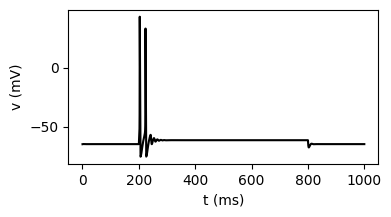

In [19]:
plt.figure(figsize=(4,2))
plt.plot(t_arr, v_arr, 'k-')
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')


In [20]:
spikes = np.array(record['spk'])
print(len(spikes))

2


In [21]:
# gnabar, gna, minf, hinf, mtau, htau, m, h, ina, Am, v0_Am, k_Am, Bm, v0_Bm, k_Bm, Ah, v0_Ah, k_Ah, Bh, v0_Bh, k_Bh	

print(soma.Am_sodium, soma.Bm_sodium)

0.1 4.0


## Updated condition

In [22]:
K = 1.1
soma.Am_sodium = 0.1  * K
soma.Bm_sodium = 4 * K
print(soma.Am_sodium, soma.Bm_sodium)

0.11000000000000001 4.4


In [23]:
h.run()
t_arr_2 = np.array(t)
v_arr_2 = np.array(v)
minf_arr_2 = np.array(minf)
mtau_arr_2 = np.array(mtau)

Text(0, 0.5, 'v (mV)')

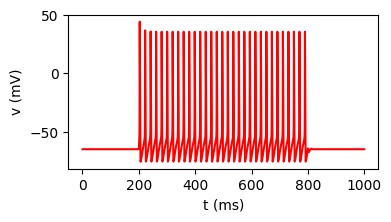

In [24]:
plt.figure(figsize=(4,2))
plt.plot(t_arr_2, v_arr_2, 'r-')
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')

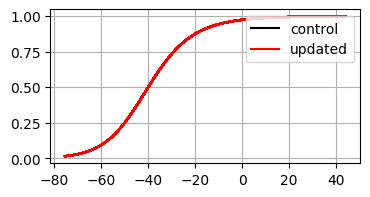

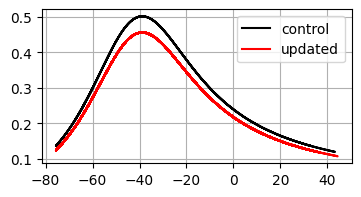

In [25]:
plt.figure(figsize=(4,2))
plt.plot(v_arr, minf_arr, 'k-', label="control")
plt.plot(v_arr_2, minf_arr_2, 'r-', label="updated")
plt.grid()
plt.legend(loc=1)
#plt.savefig('minf.png')

plt.figure(figsize=(4,2))
plt.plot(v_arr, mtau_arr, 'k-', label="control")
plt.plot(v_arr_2, mtau_arr_2, 'r-', label="updated")
plt.grid()
plt.legend(loc=1)
#plt.savefig('mtau.png')
